In [17]:
###The Packages Used###
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing as pp
import statsmodels.formula.api as smf
import plotly as py
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn import preprocessing


In [18]:
##LOADING THE INSURANCE DATA SET
ins_charges = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [19]:
### DISPLAYING THE DATAFRAME
ins_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
##FINDING THE SHAPE OF THE DF
print(ins_charges.shape)
###The summary of the numerical variables 
display(ins_charges.describe())

(1338, 7)


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
### DATA CLEANING####
### CHECKING THE NULL VALUES
ins_charges.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
#######DATA WRANGLING####
from sklearn.preprocessing import LabelEncoder
#TRANSFORMING CATEGORICAL VARIABLES INTO NUMERICAL
#SEX COLUMN
le = LabelEncoder()
le.fit(ins_charges.sex.drop_duplicates()) 
ins_charges.sex = le.transform(ins_charges.sex)
# smoker or not
le.fit(ins_charges.smoker.drop_duplicates()) 
ins_charges.smoker = le.transform(ins_charges.smoker)
#region
le.fit(ins_charges.region.drop_duplicates()) 
ins_charges.region = le.transform(ins_charges.region)
ins_charges.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [23]:
#######EXPLORATORY DATA ANALYSIS###
####PART 1######
### The Correlation table

display(ins_charges.corr())


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


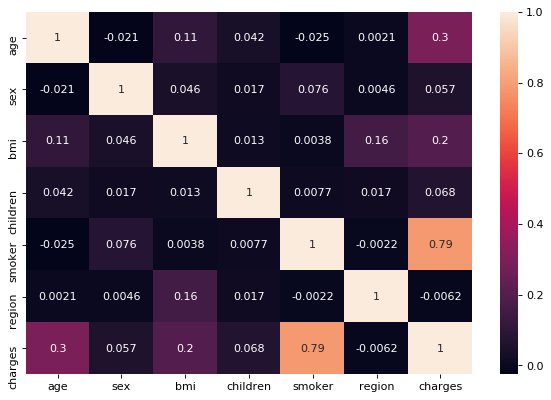

In [24]:
#setting the size of the figure
pl.figure(figsize=(9,6), dpi= 80)
#plotting the heatmap
sns.heatmap(ins_charges.corr(), annot=True)
pl.show()
###A strong correlation is observed only with the fact of smoking the patient

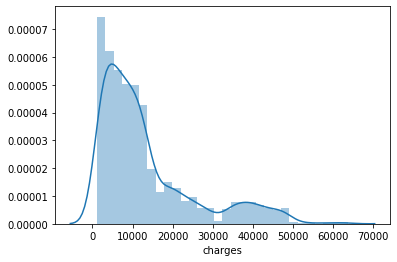

In [25]:
##First we will look into the distribution of our dependent variable, 'charges' to find out the average insurance charges
dist_charge = sns.distplot(ins_charges['charges'])
pl.show(dist_charge)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

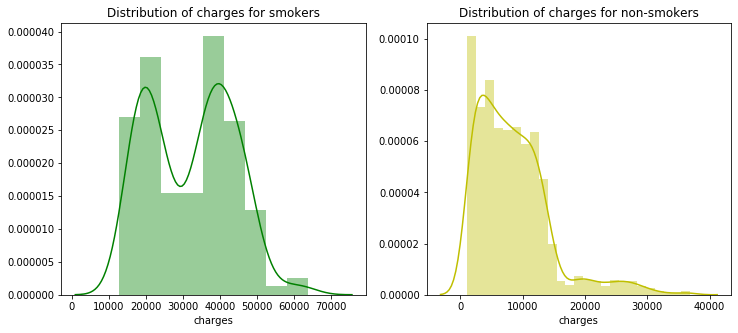

In [34]:
########EDA - PART 2####ANALYSIS OF ‘SMOKER’ WRT CHARGES:
##Since the variable 'smoker' is most influencing factor we will analyze 'smoker' w.r.t 'charges' in detail
fig= pl.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(ins_charges[(ins_charges.smoker == 1)]["charges"],color='g',ax=ax) ##ax - matplotlib axis
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.distplot(ins_charges[(ins_charges.smoker == 0)]['charges'],color='y',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

###FROM THE PLOTS WE CAN OBSERVE THAT THE CHARGES FOR NON-SMOKERS ARE LESS THAN THAT FOR SMOKERS

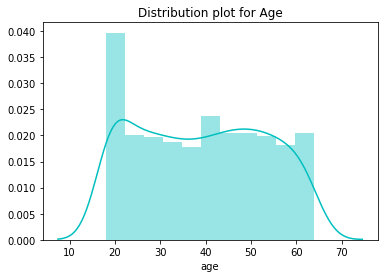

In [147]:
#######EDA PART 3 -ANALYSIS OF AGE W.R.T CHARGES AND SMOKER CATEGORY#####
##The next prominent factor is age

##Firstly, we will check the distribution of age in our data
dist_age = sns.distplot(ins_charges['age'],color = 'c')
pl.title("Distribution plot for Age")
pl.show(dist_age)

##These days teenage smoking has become a norm..let's analyze how many entries below the age of 20 are smokers and have high charges

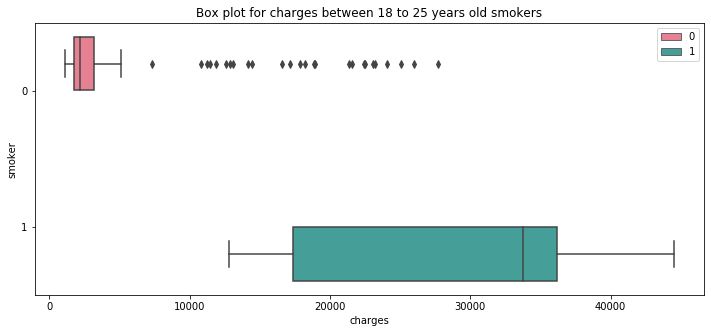

In [14]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges between 18 to 25 years old smokers")
sns.boxplot(y="smoker", x="charges", data = ins_charges[(ins_charges.age.between(18,25))] , orient="h", palette = 'husl',hue = "smoker")
pl.legend()
###FROM THE BOXPLOT WE CAN NOTICE THAT BETWEEN THE AGE OF 18 TO 25 ,BEING A SMOKER EFFECTS THE CHARGES

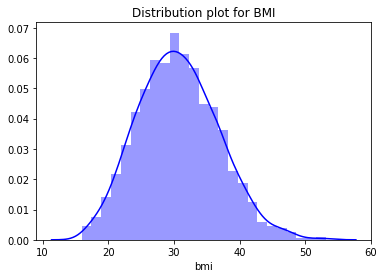

In [146]:
###### EDA PART 4 -AFFECTS OF HIGH BMI LEVEL ON CHARGES:######

##The next factor is the BMI 

dist_bmi = sns.distplot(ins_charges['bmi'],color = 'b')
pl.title("Distribution plot for BMI")
pl.show(dist_bmi)


Text(0.5, 1.0, 'Distribution of charges for obese people')

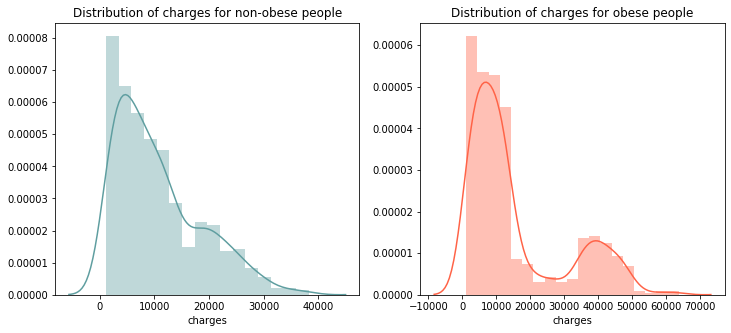

In [57]:
fig= pl.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(ins_charges[(ins_charges.bmi < 30)]["charges"],color='cadetblue',ax=ax) ##ax - matplotlib axis
ax.set_title('Distribution of charges for non-obese people')

ax=fig.add_subplot(122)
sns.distplot(ins_charges[(ins_charges.bmi >= 30)]['charges'],color='tomato',ax=ax)
ax.set_title('Distribution of charges for obese people')


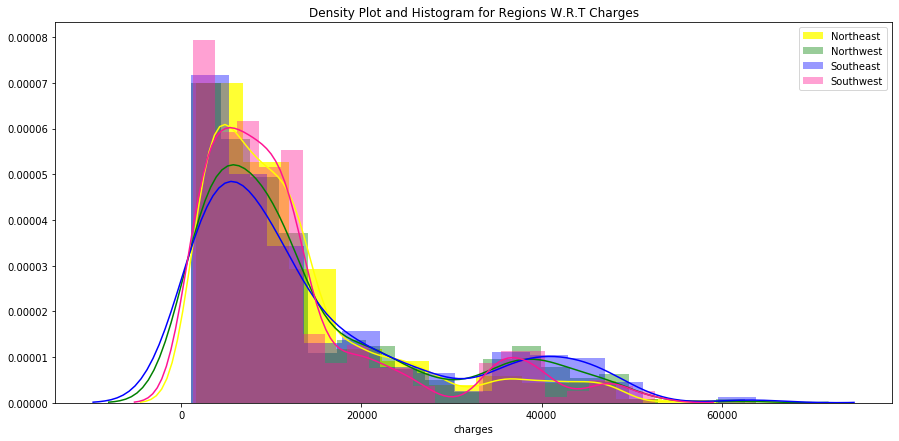

In [148]:
######EDA PART 5 - HISTOGRAM DENSITY PLOT FOR THE REGIONS W.R.T THE CHARGES######
####HISTOGRAM DENSITY PLOT FOR THE REGIONS W.R.T THE CHARGES
x1 = ins_charges.loc[ins_charges.sex== 0, 'charges']
x2 = ins_charges.loc[ins_charges.sex== 1, 'charges']
x3 = ins_charges.loc[ins_charges.region== 2, 'charges']
x4 = ins_charges.loc[ins_charges.region== 3, 'charges']

#setting figure size
pl.figure(figsize=(15,7))
#ax=fig1.add_subplot(121)
#set up the three hist, with color, label and for x1 also linewidth and depth of color on the hist
sns.distplot(x1, color = 'yellow', label="Northeast",bins = int(180/15) ,   hist_kws={"linewidth": 2, "alpha": 0.8})
sns.distplot(x2, color = 'green', label="Northwest")
#pl.hist([x1, x2,], bins = int(180/15),color = ['b','c'], label="Gender")
sns.distplot(x3, color = 'b', label="Southeast")
sns.distplot(x4, color = 'deeppink', label="Southwest")
#limit the x axis length
#pl.xlim(50,75)
#plot the legend using labels
pl.legend()
pl.title("Density Plot and Histogram for Regions W.R.T Charges")
pl.show()

In [26]:
#####MODEL BUILDING #######
###########LINEAR REGRESSION #########
#separating x and y vsariables and leave out region since it has negative correlation with charges
x_var = ins_charges[['age','sex'  , 'bmi','children',  
       'smoker']]
y_var = ins_charges['charges']

#Creating the test and train data

x_train_ins, x_test_ins, y_train_ins, y_test_ins = train_test_split(x_var, y_var, test_size=0.4, random_state=101)
print(x_train_ins.shape)
print(y_train_ins.shape)
print(x_test_ins.shape)
print(y_test_ins.shape)

(802, 5)
(802,)
(536, 5)
(536,)


In [27]:
from sklearn.linear_model import LinearRegression
#creating an empty linear model (lm)
lm = LinearRegression()
#passing in the training and testing data to the model
lm.fit(x_train_ins,y_train_ins)
#predicting the variables 
predictions_ins = lm.predict(x_test_ins)
print(predictions_ins[:15])
print(y_test_ins[:15])

[10507.0713708   2757.43892632 10038.82888657 27660.15588862
  5996.33676789   219.21878935 14771.08091869  4754.61047853
 10761.87758062  7583.31695407  7788.60452048 11144.08789223
  7077.8932382  12113.7729007  31230.57500231]
44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
295      1704.56810
20      13228.84695
1297     4340.44090
365      9778.34720
670      4837.58230
1210     5373.36425
284      9625.92000
1083     4076.49700
115     30259.99556
793     21195.81800
Name: charges, dtype: float64


Text(0, 0.5, 'Predicted Charges')

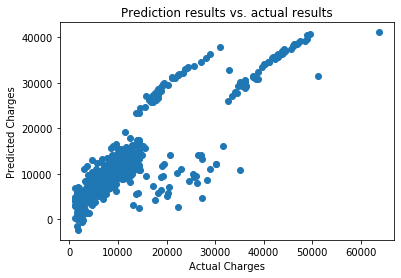

In [28]:

display(pl.scatter(y_test_ins,predictions_ins ))

pl.title('Prediction results vs. actual results')
pl.xlabel('Actual Charges')
pl.ylabel('Predicted Charges')

In [29]:
##The mean squared error
print ("Mean squared error: %.1f" % mean_squared_error(y_test_ins, predictions_ins))

##the variance
print ('The Variance score: %.2f' % r2_score(y_test_ins, predictions_ins))

Mean squared error: 31728297.6
The Variance score: 0.77


In [30]:
%matplotlib inline
import statsmodels.api as sm
model_ins = sm.OLS(y_test_ins, x_test_ins).fit()
display (model_ins.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              799.2
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                   2.13e-244
Time:                        19:32:14   Log-Likelihood:                         -5410.6
No. Observations:                 536   AIC:                                  1.083e+04
Df Residuals:                     531   BIC:                                  1.085e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          240.1486     16.757     14.332      0.000     207.231     273.066
sex         -926.6500    505.948     -1.832      0.068   -1920.556      67.256
bmi          -23.3317     24.656     -0.946      0.344     -71.767      25.104
children     293.7330    210.496      1.395      0.163    -119.774     707.240
smoker      2.395e+04    675.469     35.460      0.000    2.26e+04    2.53e+04
==============================================================================
Omnibus:                      114.332   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.950
Skew:                           1.052   Prob(JB):                     9.96e-67
Kurtosis:                       6.030   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          3.00e-143
Time:                        19:33:14   Log-Likelihood:                -3257.9
No. Observations:                 335   AIC:                             6554.
Df Residuals:                     316   BIC:                             6626.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.2410   6737.431      0.071      0.943   -1.28e+04    1.37e+04
x1          -340.9486    141.089     -2.417      0.016    -618.541     -63.356
x2         -1004.9584   1436.114     -0.700      0.485   -3830.513    1820.596
x3           471.8445    378.600      1.246      0.214    -273.052    1216.741
x4          4153.8352   1412.427      2.941      0.004    1374.886    6932.784
x5         -1.152e+04   1611.526     -7.150      0.000   -1.47e+04   -8351.251
x6             7.3066      1.528      4.781      0.000       4.300      10.314
x7            46.8423     33.692      1.390      0.165     -19.447     113.131
x8             0.6214      3.059      0.203      0.839      -5.397       6.639
x9           -30.2688     15.410     -1.964      0.050     -60.587       0.050
x10          -55.7892     41.277     -1.352      0.177    -137.002      25.424
x11        -1004.9584   1436.114     -0.700      0.485   -3830.513    1820.596
x12          -34.9218     84.104     -0.415      0.678    -200.396     130.552
x13           26.6341    403.807      0.066      0.947    -767.856     821.125
x14         2086.7414   1186.141      1.759      0.079    -246.991    4420.473
x15           -7.3308      5.988     -1.224      0.222     -19.113       4.451
x16          -58.0468     36.962     -1.570      0.117    -130.770      14.677
x17         1568.0340     99.625     15.739      0.000    1372.021    1764.047
x18         -138.0908    151.754     -0.910      0.364    -436.666     160.484
x19          -66.0421    493.123     -0.134      0.894   -1036.262     904.178
x20        -1.152e+04   1611.526     -7.150      0.000   -1.47e+04   -8351.251
==============================================================================
Omnibus:                      174.305   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.129
Skew:                           2.244   Prob(JB):                    6.18e-188
Kurtosis:                       9.451   Cond. No.                     7.49e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

0.8849197344147237


Text(0, 0.5, 'Predicted Charges')

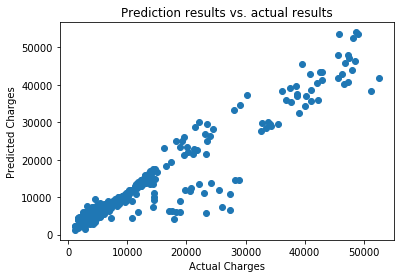

In [31]:
###POLYNOMIAL REGRESSION########
X = ins_charges.drop(['charges','region'], axis = 1)
Y = ins_charges.charges


###TRANSFORMING THE INDEPENDENT VARIABLES TO DEGREE 2
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
###TEST AND TRAIN SPLITTING WAS 75% AND 25%(THE DEFAULT SETTING)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)
##BUILDING THE MODEL
plr = LinearRegression().fit(X_train,Y_train)
model_quad = sm.OLS(Y_test,X_test).fit()

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
###THE REGRESSION RESULTS
display(model_quad.summary())
print(plr.score(X_test,Y_test))
predictions_quad = model_quad.predict(X_test) 
##THE SCATTER PLOT
display(pl.scatter(Y_test, predictions_quad))
pl.title('Prediction results vs. actual results')
pl.xlabel('Actual Charges')
pl.ylabel('Predicted Charges')


In [69]:

###PERFORMING RANDOM FOREST REGRESSION#######
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train_ins,y_train_ins)
forest_train_pred = forest.predict(x_train_ins)
forest_test_pred = forest.predict(x_test_ins)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train_ins,forest_train_pred),
mean_squared_error(y_test_ins,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train_ins,forest_train_pred),
r2_score(y_test_ins,forest_test_pred)))

MSE train data: 3852549.301, MSE test data: 24511525.931
R2 train data: 0.975, R2 test data: 0.819


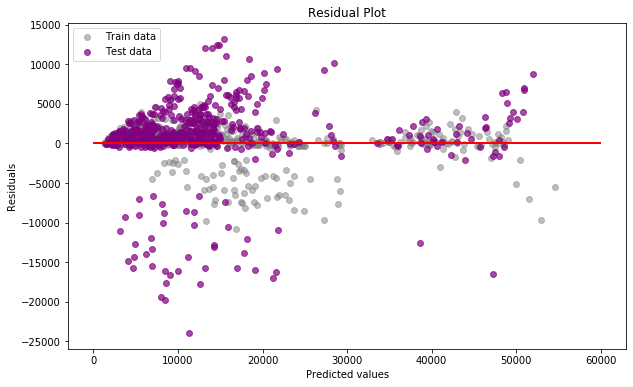

In [149]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train_ins,
          c = 'grey', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test_ins,
          c = 'purple', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.title("Residual Plot")
pl.show()

----------------------------------------------------THE END-------------------------------------------------------------
